# Baseline: Linear model logistic regression
Just simple linear model on Logistic regression, used to tune and create ml pipeline with baseline model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
DATASET_PATH = '../data/raw/zalando-fashionmnist/'
random_seed = 654321
img_width = 28
img_height = 28

In [3]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import yaml

In [4]:
train_df = pd.read_csv(f'{DATASET_PATH}/fashion-mnist_train.csv', dtype=np.int16)
test_df = pd.read_csv(f'{DATASET_PATH}/fashion-mnist_test.csv', dtype=np.int16)
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [5]:
def extract_X_y(df):
    pixel_features = df.columns[df.columns.str.contains('pixel')]
    return df[pixel_features], df['label']

X_train, y_train = extract_X_y(train_df)
X_test, y_test = extract_X_y(test_df)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [6]:
def load_label_titles():
    with open(f'../data/raw/label-titles.yaml', 'r') as stream:
        return yaml.safe_load(stream)
    
label_titles = load_label_titles()
label_titles

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# TODO: would normalization (scale) helps?

In [7]:
solver = 'lbfgs'
# for small datasets 'liblinear'
# 'sag' and 'saga' for large
# 'newton-cg'

multi_class='multinomial'

clf = LogisticRegression(solver=solver, multi_class=multi_class, random_state=random_seed, n_jobs=-1, max_iter=100)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print('train_accuracy', train_accuracy)
print('test_accuracy', test_accuracy)

train_accuracy 0.86205
test_accuracy 0.8544


In [8]:
def plot_confusion_matrix(confusion_matrix, class_names=None, fontsize=14):
    """
    based on https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=(10,7))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig    

# TODO: what is the right way to store metrics and confusion matrix (png image)?


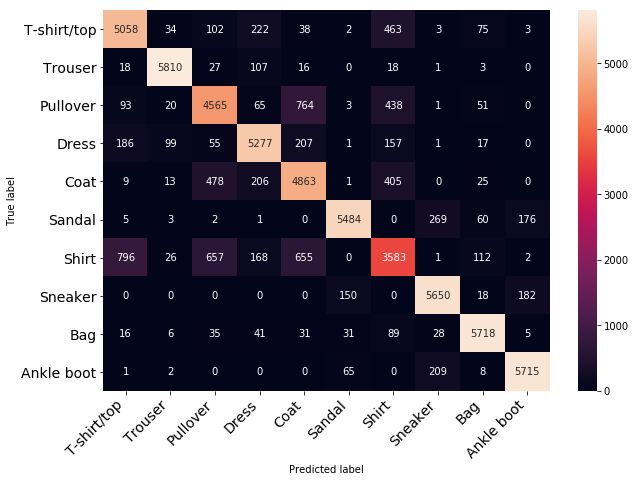

In [9]:
y_train_pred = clf.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred, range(len(label_titles)))
plot_confusion_matrix(train_cm, label_titles);

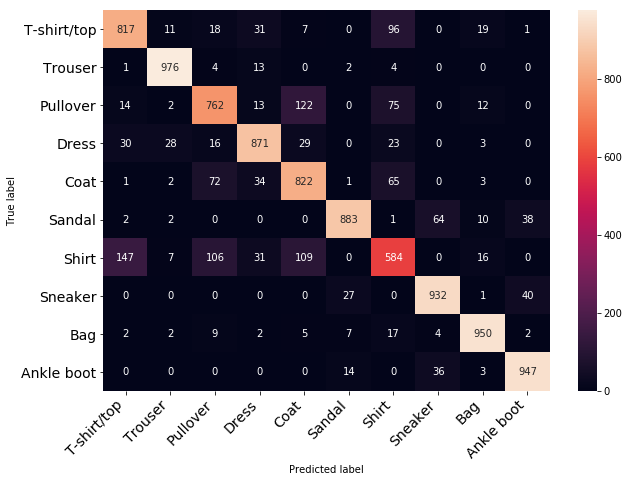

In [10]:
y_test_pred = clf.predict(X_test)
test_cm = confusion_matrix(y_test, y_test_pred, range(len(label_titles)))
plot_confusion_matrix(test_cm, label_titles);